In [162]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [163]:
df_raw = pd.read_json("../../combined.json")

In [164]:
len(df_raw)

1573

In [165]:
df_raw = df_raw[df_raw.type == 'Ride']

In [166]:
len(df_raw)

1388

In [167]:
df_raw.describe()

achievement_count  athlete_count  average_cadence  average_heartrate  \
count        1388.000000    1388.000000        47.000000          58.000000   
mean            1.206052       1.074207        63.038298         138.756897   
std             4.419028       0.283348         5.814171          13.729123   
min             0.000000       1.000000        47.500000          74.000000   
25%             0.000000       1.000000        61.550000         131.900000   
50%             0.000000       1.000000        64.100000         141.400000   
75%             1.000000       1.000000        66.900000         147.925000   
max           108.000000       3.000000        70.300000         166.800000   

       average_speed  average_temp  average_watts  comment_count  \
count    1388.000000     31.000000    1350.000000    1388.000000   
mean        5.415999     17.032258      96.532519       0.373199   
std         0.733959      5.570660      17.005167       1.498060   
min         0.000000      3.000000      22.500000       0.000000   
25%         5.143250     14.500000      85.700000       0.000000   
50%         5.522000     17.000000      96.400000       0.000000   
75%         5.816250     19.000000     108.300000       0.000000   
max        14.270000     31.000000     142.400000      37.000000   

       device_watts       distance      ...          pr_count  resource_state  \
count        1388.0    1388.000000      ...       1388.000000          1388.0   
mean            0.0    9714.698415      ...          0.504323             2.0   
std             0.0   15149.881908      ...          2.042267             0.0   
min             0.0      21.300000      ...          0.000000             2.0   
25%             0.0    6001.625000      ...          0.000000             2.0   
50%             0.0    6167.500000      ...          0.000000             2.0   
75%             0.0    6581.950000      ...          0.000000             2.0   
max             0.0  170918.000000      ...         36.000000             2.0   

       start_latitude  start_longitude  suffer_score  total_elevation_gain  \
count     1352.000000      1352.000000     58.000000           1388.000000   
mean        55.740214        -4.065348    113.103448             47.067939   
std          2.147835         4.195215    102.446510            106.502510   
min        -16.920000       -13.510000      9.000000              0.000000   
25%         55.840000        -4.280000     48.000000             12.500000   
50%         55.860000        -4.280000     65.500000             24.600000   
75%         55.860000        -4.230000    151.000000             49.300000   
max         57.480000       145.780000    459.000000           1581.000000   

       total_photo_count     upload_id    utc_offset  workout_type  
count        1388.000000  1.351000e+03   1388.000000   1274.000000  
mean            0.152017  9.621128e+08   2663.688761      7.167975  
std             0.676586  6.165093e+08   1896.950445      4.509400  
min             0.000000  5.392029e+07      0.000000      0.000000  
25%             0.000000  4.344789e+08      0.000000      0.000000  
50%             0.000000  7.941077e+08   3600.000000     10.000000  
75%             0.000000  1.467242e+09   3600.000000     10.000000  
max             8.000000  2.143090e+09  36000.000000     12.000000  

[8 rows x 31 columns]

In [168]:
df_raw.head()

achievement_count                               athlete  athlete_count  \
0                  4  {'id': 1955887, 'resource_state': 1}              1   
1                 10  {'id': 1955887, 'resource_state': 1}              1   
2                 16  {'id': 1955887, 'resource_state': 1}              1   
3                  2  {'id': 1955887, 'resource_state': 1}              1   
4                  2  {'id': 1955887, 'resource_state': 1}              1   

   average_cadence  average_heartrate  average_speed  average_temp  \
0              NaN                NaN          5.983           NaN   
1              NaN                NaN          6.013           NaN   
2              NaN                NaN          6.540           NaN   
3              NaN                NaN          6.320           NaN   
4              NaN                NaN          6.091           NaN   

   average_watts  comment_count  commute      ...       suffer_score  \
0          107.7              0    False      ...                NaN   
1          108.1              0    False      ...                NaN   
2          120.9              2    False      ...                NaN   
3          111.8              7    False      ...                NaN   
4           94.7              8    False      ...                NaN   

                    timezone  total_elevation_gain  total_photo_count  \
0  (GMT+00:00) Europe/London                 210.5                  0   
1  (GMT+00:00) Europe/London                 245.8                  0   
2  (GMT+00:00) Europe/London                 227.9                  0   
3  (GMT+00:00) Europe/London                 271.4                  0   
4  (GMT+00:00) Europe/London                 119.0                  0   

   trainer  type   upload_id utc_offset  visibility  workout_type  
0    False  Ride  64627003.0       3600    everyone           NaN  
1    False  Ride  63419300.0       3600    everyone           NaN  
2    False  Ride  62880434.0       3600    everyone           NaN  
3    False  Ride  62010103.0       3600    everyone           NaN  
4    False  Ride  61331055.0       3600    everyone           NaN  

[5 rows x 55 columns]

In [169]:
df_raw.drop(['map', 'athlete', 'start_latlng', 'end_latlng', 'upload_id'], axis=1, inplace=True)

In [170]:
df_raw.describe()

achievement_count  athlete_count  average_cadence  average_heartrate  \
count        1388.000000    1388.000000        47.000000          58.000000   
mean            1.206052       1.074207        63.038298         138.756897   
std             4.419028       0.283348         5.814171          13.729123   
min             0.000000       1.000000        47.500000          74.000000   
25%             0.000000       1.000000        61.550000         131.900000   
50%             0.000000       1.000000        64.100000         141.400000   
75%             1.000000       1.000000        66.900000         147.925000   
max           108.000000       3.000000        70.300000         166.800000   

       average_speed  average_temp  average_watts  comment_count  \
count    1388.000000     31.000000    1350.000000    1388.000000   
mean        5.415999     17.032258      96.532519       0.373199   
std         0.733959      5.570660      17.005167       1.498060   
min         0.000000      3.000000      22.500000       0.000000   
25%         5.143250     14.500000      85.700000       0.000000   
50%         5.522000     17.000000      96.400000       0.000000   
75%         5.816250     19.000000     108.300000       0.000000   
max        14.270000     31.000000     142.400000      37.000000   

       device_watts       distance      ...       photo_count     pr_count  \
count        1388.0    1388.000000      ...            1388.0  1388.000000   
mean            0.0    9714.698415      ...               0.0     0.504323   
std             0.0   15149.881908      ...               0.0     2.042267   
min             0.0      21.300000      ...               0.0     0.000000   
25%             0.0    6001.625000      ...               0.0     0.000000   
50%             0.0    6167.500000      ...               0.0     0.000000   
75%             0.0    6581.950000      ...               0.0     0.000000   
max             0.0  170918.000000      ...               0.0    36.000000   

       resource_state  start_latitude  start_longitude  suffer_score  \
count          1388.0     1352.000000      1352.000000     58.000000   
mean              2.0       55.740214        -4.065348    113.103448   
std               0.0        2.147835         4.195215    102.446510   
min               2.0      -16.920000       -13.510000      9.000000   
25%               2.0       55.840000        -4.280000     48.000000   
50%               2.0       55.860000        -4.280000     65.500000   
75%               2.0       55.860000        -4.230000    151.000000   
max               2.0       57.480000       145.780000    459.000000   

       total_elevation_gain  total_photo_count    utc_offset  workout_type  
count           1388.000000        1388.000000   1388.000000   1274.000000  
mean              47.067939           0.152017   2663.688761      7.167975  
std              106.502510           0.676586   1896.950445      4.509400  
min                0.000000           0.000000      0.000000      0.000000  
25%               12.500000           0.000000      0.000000      0.000000  
50%               24.600000           0.000000   3600.000000     10.000000  
75%               49.300000           0.000000   3600.000000     10.000000  
max             1581.000000           8.000000  36000.000000     12.000000  

[8 rows x 30 columns]

In [171]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [172]:
display_all(df_raw.describe(include='all').T)

count unique  \
achievement_count              1388    NaN   
athlete_count                  1388    NaN   
average_cadence                  47    NaN   
average_heartrate                58    NaN   
average_speed                  1388    NaN   
average_temp                     31    NaN   
average_watts                  1350    NaN   
comment_count                  1388    NaN   
commute                        1388      2   
device_watts                   1388    NaN   
display_hide_heartrate_option  1388      1   
distance                       1388    NaN   
elapsed_time                   1388    NaN   
elev_high                      1351    NaN   
elev_low                       1351    NaN   
external_id                    1351   1351   
flagged                        1388      1   
from_accepted_tag              1351    NaN   
gear_id                        1388      3   
has_heartrate                  1388      2   
has_kudoed                     1388      2   
heartrate_opt_out              1388      1   
id                             1388    NaN   
kilojoules                     1350    NaN   
kudos_count                    1388    NaN   
location_city                   901      6   
location_country               1387      1   
location_state                  784      1   
manual                         1388      2   
max_heartrate                    58    NaN   
max_speed                      1388    NaN   
moving_time                    1388    NaN   
name                           1388    239   
photo_count                    1388    NaN   
pr_count                       1388    NaN   
private                        1388      1   
resource_state                 1388    NaN   
start_date                     1388   1388   
start_date_local               1388   1388   
start_latitude                 1352    NaN   
start_longitude                1352    NaN   
suffer_score                     58    NaN   
timezone                       1388      5   
total_elevation_gain           1388    NaN   
total_photo_count              1388    NaN   
trainer                        1388      1   
type                           1388      1   
utc_offset                     1388    NaN   
visibility                     1388      1   
workout_type                   1274    NaN   

                                                                top  freq  \
achievement_count                                               NaN   NaN   
athlete_count                                                   NaN   NaN   
average_cadence                                                 NaN   NaN   
average_heartrate                                               NaN   NaN   
average_speed                                                   NaN   NaN   
average_temp                                                    NaN   NaN   
average_watts                                                   NaN   NaN   
comment_count                                                   NaN   NaN   
commute                                                        True   761   
device_watts                                                    NaN   NaN   
display_hide_heartrate_option                                 False  1388   
distance                                                        NaN   NaN   
elapsed_time                                                    NaN   NaN   
elev_high                                                       NaN   NaN   
elev_low                                                        NaN   NaN   
external_id                    4AAA65B5-1270-482C-B788-5FF899DD5DC6     1   
flagged                                                       False  1388   
from_accepted_tag                                               NaN   NaN   
gear_id                                                    b1290976  1300   
has_heartrate                                                 False  1330   
has_kudoed                                                    Fals

/workspace/conda/envs/fastai/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/workspace/conda/envs/fastai/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


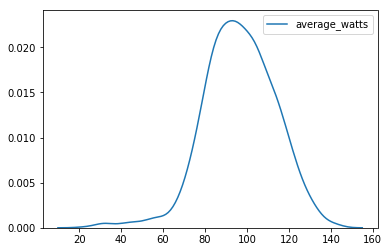

In [213]:
sns.kdeplot(df_raw.average_watts)

In [221]:
df_raw[df_raw.commute == 0].average_watts.sum()

54522.7

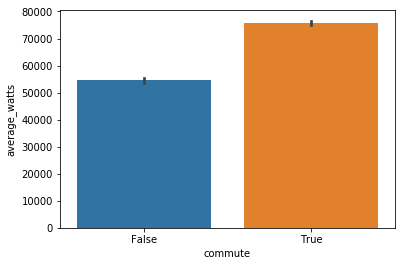

In [220]:
sns.barplot(x="commute", y="average_watts", data=df_raw, estimator=sum)

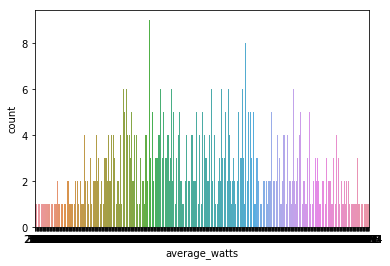

In [210]:
sns.countplot(x="average_watts", data=df_raw)

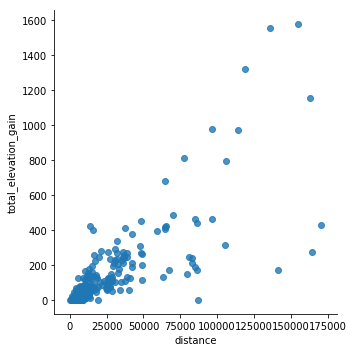

In [174]:
sns.lmplot('distance', 'total_elevation_gain', data=df_raw, fit_reg=False)

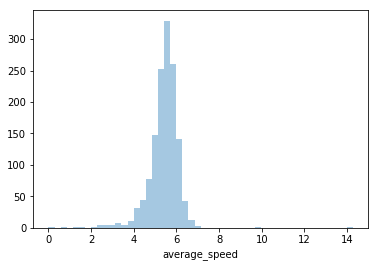

In [175]:
sns.distplot(df_raw.average_speed, kde=False);

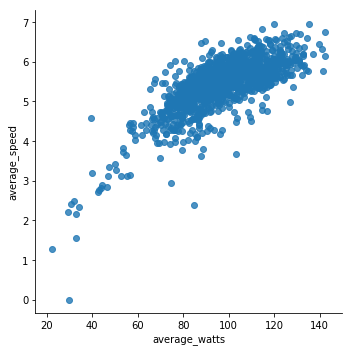

In [176]:
sns.lmplot('average_watts', 'average_speed', data=df_raw, fit_reg=False)

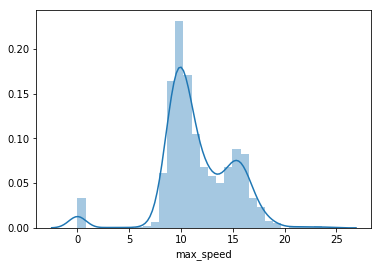

In [177]:
sns.distplot(df_raw.max_speed)

In [178]:
add_datepart(df_raw, 'start_date_local')

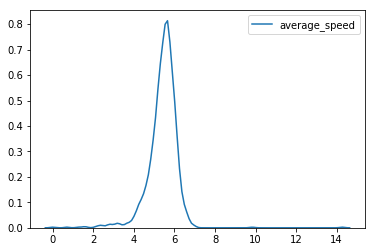

In [179]:
sns.kdeplot(df_raw.average_speed)

/workspace/conda/envs/fastai/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/workspace/conda/envs/fastai/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


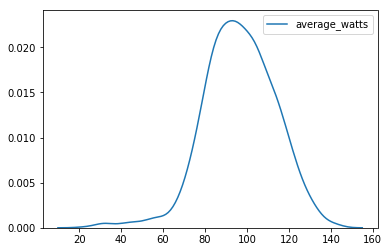

In [180]:
sns.kdeplot(df_raw.average_watts)

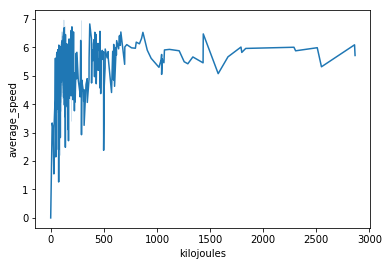

In [181]:
sns.lineplot(x="kilojoules", y="average_speed", data=df_raw)

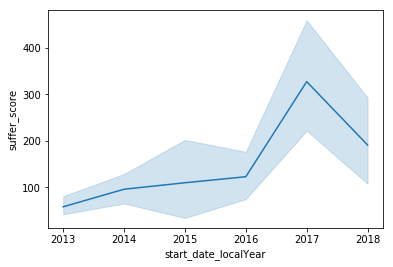

In [182]:
sns.lineplot(x="start_date_localYear", y="suffer_score", data=df_raw)

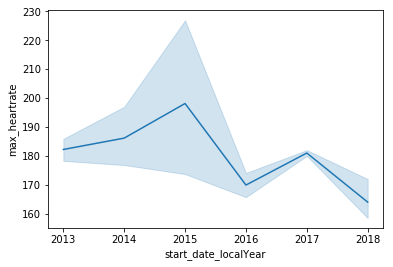

In [183]:
sns.lineplot(x="start_date_localYear", y="max_heartrate", data=df_raw)

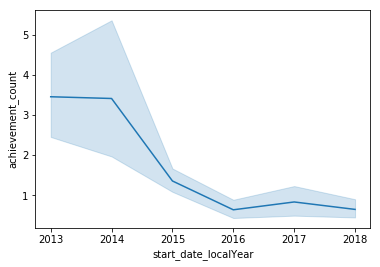

In [184]:
sns.lineplot(x="start_date_localYear", y="achievement_count", data=df_raw)

In [185]:
df_raw.location_state.value_counts()

Scotland    784
Name: location_state, dtype: int64

In [186]:
train_cats(df_raw)

In [187]:
df_raw.type.cat.categories

Index(['Ride'], dtype='object')

In [188]:
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1571
Data columns (total 62 columns):
achievement_count                   1388 non-null int64
athlete_count                       1388 non-null int64
average_cadence                     47 non-null float64
average_heartrate                   58 non-null float64
average_speed                       1388 non-null float64
average_temp                        31 non-null float64
average_watts                       1350 non-null float64
comment_count                       1388 non-null int64
commute                             1388 non-null bool
device_watts                        1388 non-null float64
display_hide_heartrate_option       1388 non-null bool
distance                            1388 non-null float64
elapsed_time                        1388 non-null int64
elev_high                           1351 non-null float64
elev_low                            1351 non-null float64
external_id                         1351 no

In [189]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

achievement_count                   0.000000
athlete_count                       0.000000
average_cadence                     0.966138
average_heartrate                   0.958213
average_speed                       0.000000
average_temp                        0.977666
average_watts                       0.027378
comment_count                       0.000000
commute                             0.000000
device_watts                        0.000000
display_hide_heartrate_option       0.000000
distance                            0.000000
elapsed_time                        0.000000
elev_high                           0.026657
elev_low                            0.026657
external_id                         0.026657
flagged                             0.000000
from_accepted_tag                   0.026657
gear_id                             0.000000
has_heartrate                       0.000000
has_kudoed                          0.000000
heartrate_opt_out                   0.000000
id        

In [190]:
df, y, nas = proc_df(df_raw, 'average_speed')

In [191]:
nas

{'average_cadence': 64.1,
 'average_heartrate': 141.4,
 'average_temp': 17.0,
 'average_watts': 96.4,
 'elev_high': 17.8,
 'elev_low': 2.4,
 'from_accepted_tag': 0.0,
 'kilojoules': 113.05,
 'max_heartrate': 179.5,
 'start_latitude': 55.86,
 'start_longitude': -4.28,
 'suffer_score': 65.5,
 'workout_type': 10.0}

In [192]:
display_all(df)

achievement_count  athlete_count  average_cadence  average_heartrate  \
0                     4              1             64.1              141.4   
1                    10              1             64.1              141.4   
2                    16              1             64.1              141.4   
3                     2              1             64.1              141.4   
4                     2              1             64.1              141.4   
5                     5              1             64.1              141.4   
6                     1              1             64.1              141.4   
7                     2              1             64.1              141.4   
8                     1              1             64.1              141.4   
9                     1              1             64.1              141.4   
10                    1              1             64.1              141.4   
11                    1              1             64.1              141.4   
12                    0              1             64.1              141.4   
13                    0              1             64.1              141.4   
14                    0              1             64.1              141.4   
15                    4              1             64.0              144.4   
16                    4              1             70.3              149.8   
17                    9              1             67.0              144.9   
18                    6              1             67.7              152.0   
19                    2              1             62.0              141.3   
20                    0              1             63.3              149.8   
21                    7              1             70.2              144.9   
22                    1              1             66.4              151.4   
23                    0              3             68.4              154.8   
24                    0              1             60.4              126.1   
25                    1              1             51.7              121.1   
26                   10              1             63.8              148.1   
27                    2              1             64.1              141.4   
28                    7              1             64.1              141.4   
29                    8              1             64.1              141.4   
30                    3              1             64.1              141.4   
31                    1              1             64.1              141.4   
32                    4              1             64.1              141.4   
33                    3              1             64.1              141.4   
34                    3              1             64.1              141.4   
35                    8              1             64.1              141.4   
36                    0              1             63.7              135.8   
37                    0              1             68.7              142.8   
38                    4              1             64.3              143.9   
39                    8              1             63.4              140.5   
40                    4              1             66.1              149.1   
41                    1              1             64.0              139.1   
42                    8              2             69.9              161.1   
43                    3              1             62.8              151.0   
44                    0              1             66.6              148.4   
45                    0              1             63.5              142.4   
46                    0              1             55.8              149.7   
49                    1              1             64.1              126.2   
50                    1              1             64.1              141.4   
51                    2              1             64.1              141.4   
57                    0     

In [193]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/workspace/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9528618052041571

In [194]:
len(df)

1388

In [195]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 20  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1368, 74), (1368,), (20, 74))

In [196]:
m.fit(X_train, y_train)
m.score(X_valid, y_valid)

0.2400940036711844

In [197]:
## Base model

In [198]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [199]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/workspace/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 294 ms, sys: 3.54 ms, total: 298 ms
Wall time: 130 ms
[0.17899868436595903, 1.0407547189419804, 0.9389071467306873, 0.2699262934820953]


In [200]:
df_trn, y_trn, nas = proc_df(df_raw, 'athlete_count', subset=300, na_dict=nas)
X_train, _ = split_vals(df_trn, 200)
y_train, _ = split_vals(y_trn, 200)

In [201]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/workspace/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 28.2 ms, sys: 3.54 ms, total: 31.7 ms
Wall time: 111 ms
[0.09082951062292476, 4.2560920044096795, 0.8642533936651584, -11.209333181583219]


In [202]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.18661276570568347, 4.249268072268447, 0.4269958975841332, -11.170213317789768]


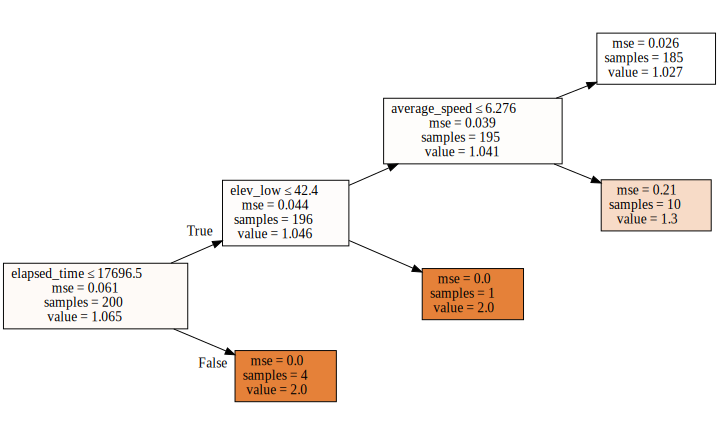

In [203]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [204]:
fi = rf_feat_importance(m, df_trn); fi[:10]


cols       imp
11                  elapsed_time  0.687509
13                      elev_low  0.176284
3                  average_speed  0.136206
0              achievement_count  0.000000
54  start_date_localIs_month_end  0.000000
53     start_date_localDayofyear  0.000000
52     start_date_localDayofweek  0.000000
51           start_date_localDay  0.000000
50          start_date_localWeek  0.000000
49         start_date_localMonth  0.000000

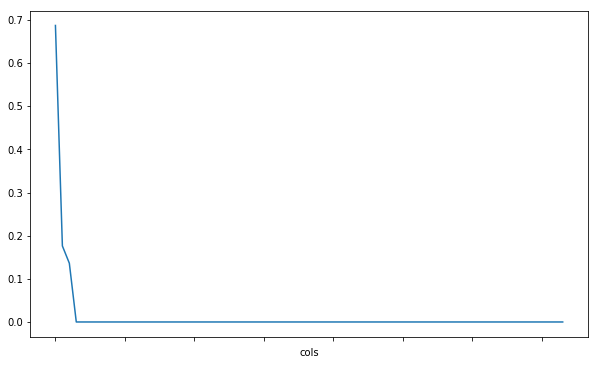

In [205]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);


In [206]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

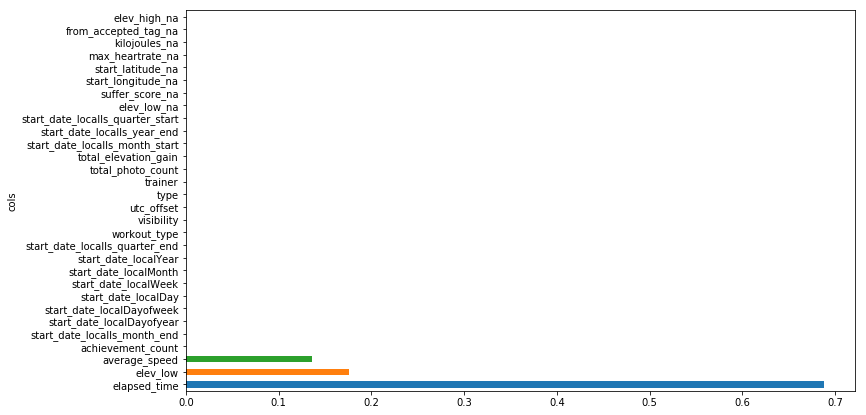

In [207]:
plot_fi(fi[:30]);